In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,auc

features_df = pd.read_csv("features.csv")

print (features_df.head())


   label  word_count  character_count  capital_letters_count  digit_count  \
0      1          13               75                      4            0   
1      1          16               80                      1            0   
2      1          14               67                      2            0   
3      1          17               81                      2            0   
4      1          18               85                      3            0   

   punctuation_count  capital_ratio  digit_ratio  punctuation_ratio  \
0                  5       0.053333          0.0           0.066667   
1                  3       0.012500          0.0           0.037500   
2                  2       0.029851          0.0           0.029851   
3                  2       0.024691          0.0           0.024691   
4                  2       0.035294          0.0           0.023529   

   sentiment_score  rating  
0           0.9593       5  
1           0.8910       5  
2           0.7906     

In [27]:
feature_names = ['rating', 'capital_ratio', 'digit_ratio', 'punctuation_ratio', 'word_count', 'character_count', 'capital_letters_count', 'digit_count', 'punctuation_count' , 'sentiment_score']
X = features_df[feature_names]
y = features_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.63
Accuracy of Logistic regression classifier on test set: 0.62


C:\Users\ambtr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# decision tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.65


In [30]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.67


In [31]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.65
Accuracy of LDA classifier on test set: 0.65


In [32]:
# GNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.54
Accuracy of GNB classifier on test set: 0.53


In [33]:
# RFC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of RFC classifier on training set: 1.00
Accuracy of RFC classifier on test set: 0.71


In [34]:
def generate_all_curves(model_list, probs_list):
    fpr_list = []
    tpr_list = []
    threshold_list = []
    roc_auc_list = []
    
    for model,probs in zip(model_list,probs_list):
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_test, preds)
        roc_auc = auc(fpr, tpr)
        
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        threshold_list.append(threshold)
        roc_auc_list.append(roc_auc)
    
    fig, axs = plt.subplots(2, 3, figsize=(15,10)) #subplot_kw=dict(polar=True))

    #for roc_values in zip(fpr_list,tpr_list,threshold_list,roc_auc_list):
    axs[0, 0].plot(fpr_list[0], tpr_list[0], 'b', label = 'AUC = %0.2f' % roc_auc_list[0])
    axs[0, 0].legend(loc = 'lower right')
    axs[0, 0].plot([0, 1], [0, 1],'r--')
    axs[0, 0].set_title('Logistic Regression Classifier')
    axs[0, 0].set_ylabel('True Positive Rate')
    axs[0, 0].set_xlabel('False Positive Rate')
    
    axs[0, 1].plot(fpr_list[1], tpr_list[1], 'b', label = 'AUC = %0.2f' % roc_auc_list[1])
    axs[0, 1].legend(loc = 'lower right')
    axs[0, 1].plot([0, 1], [0, 1],'r--')
    axs[0, 1].set_title('Decision Tree Classifier')
    axs[0, 1].set_ylabel('True Positive Rate')
    axs[0, 1].set_xlabel('False Positive Rate')
    
    axs[0, 2].plot(fpr_list[2], tpr_list[2], 'b', label = 'AUC = %0.2f' % roc_auc_list[2])
    axs[0, 2].legend(loc = 'lower right')
    axs[0, 2].plot([0, 1], [0, 1],'r--')
    axs[0, 2].set_title('KNN Classifier')
    axs[0, 2].set_ylabel('True Positive Rate')
    axs[0, 2].set_xlabel('False Positive Rate')
    
    axs[1, 0].plot(fpr_list[3], tpr_list[3], 'b', label = 'AUC = %0.2f' % roc_auc_list[3])
    axs[1, 0].legend(loc = 'lower right')
    axs[1, 0].plot([0, 1], [0, 1],'r--')
    axs[1, 0].set_title('LDA Classifier')
    axs[1, 0].set_ylabel('True Positive Rate')
    axs[1, 0].set_xlabel('False Positive Rate')
    
    axs[1, 1].plot(fpr_list[4], tpr_list[4], 'b', label = 'AUC = %0.2f' % roc_auc_list[4])
    axs[1, 1].legend(loc = 'lower right')
    axs[1, 1].plot([0, 1], [0, 1],'r--')
    axs[1, 1].set_title('GNB Classifier')
    axs[1, 1].set_ylabel('True Positive Rate')
    axs[1, 1].set_xlabel('False Positive Rate')
    
    axs[1, 2].plot(fpr_list[5], tpr_list[5], 'b', label = 'AUC = %0.2f' % roc_auc_list[5])
    axs[1, 2].legend(loc = 'lower right')
    axs[1, 2].plot([0, 1], [0, 1],'r--')
    axs[1, 2].set_title('RFC Classifier')
    axs[1, 2].set_ylabel('True Positive Rate')
    axs[1, 2].set_xlabel('False Positive Rate')
    
    #plt.title("ROC AUC plots for all 6 Classifiers")
    
    plt.show()

In [35]:
def confusion_matrixes(model_list, model_names):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    for cls, ax, model_name in zip(model_list, axes.flatten(),model_names):
        plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["True","Fake"])
        ax.title.set_text(model_name)
    
    plt.tight_layout()  
    plt.show()

In [36]:
def load_up_classifier(classifier, x_train, x_test, y_train, y_test):
    
    model = classifier
    model = model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    probs = model.predict_proba(x_test)

    return model, probs

C:\Users\ambtr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


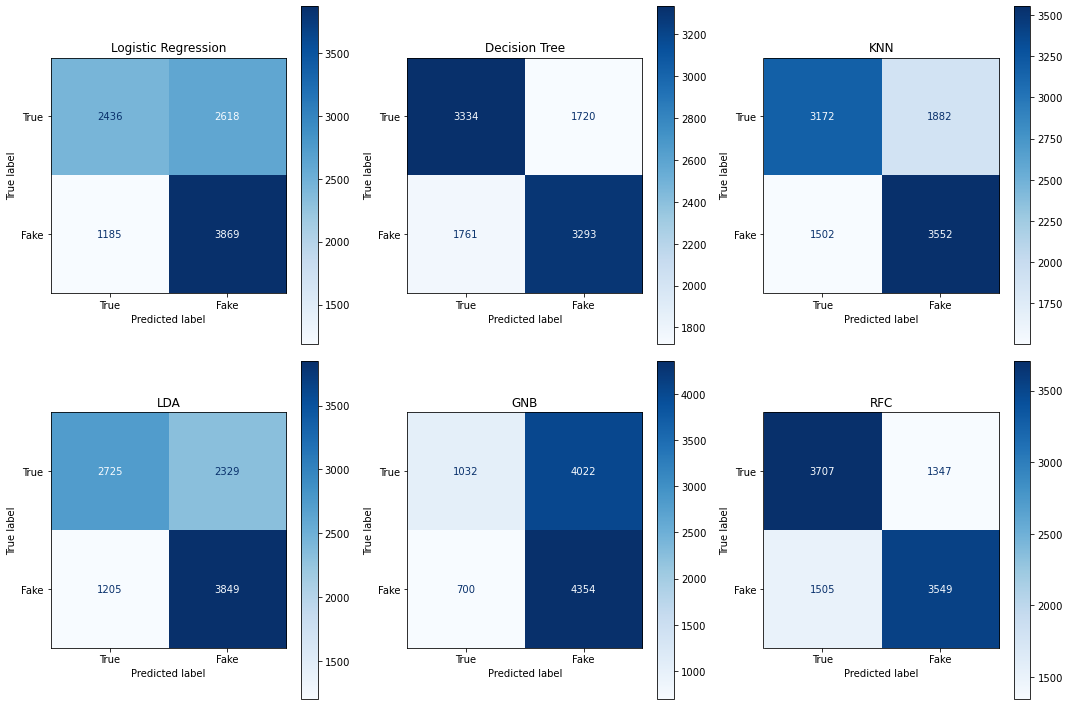

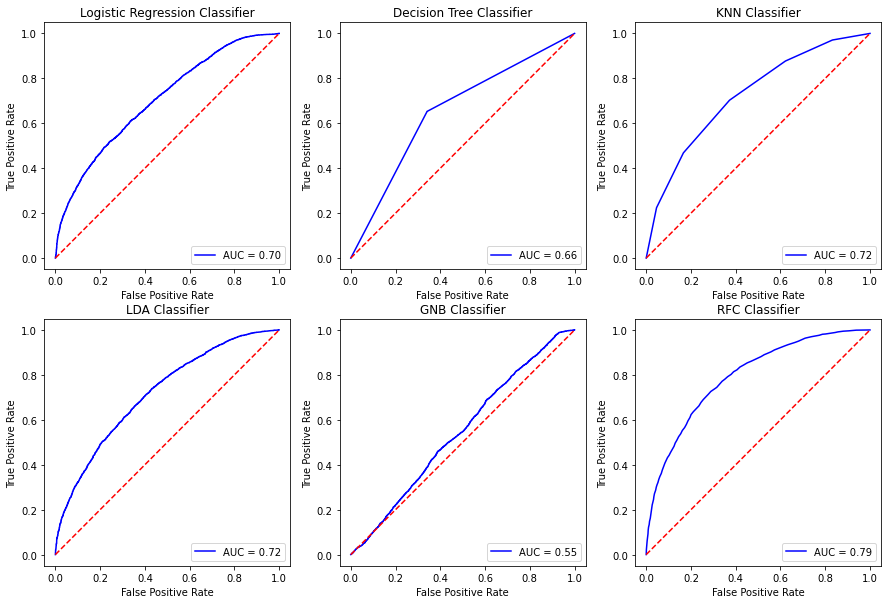

In [37]:
classifier_list = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearDiscriminantAnalysis(), GaussianNB(), RandomForestClassifier()]
model_list = []
probs_list = []
for classifier in classifier_list:
    train_model, probs = load_up_classifier(classifier, X_train, X_test, y_train, y_test)
    model_list.append(train_model)
    probs_list.append(probs)

model_names = ["Logistic Regression", "Decision Tree", "KNN", "LDA", "GNB", "RFC"]
confusion_matrixes(model_list=model_list, model_names=model_names)

#Generate AUC (Area Under The Curve)- ROC (Receiver Operating Characteristics) curve
generate_all_curves(model_list = model_list, probs_list = probs_list)